In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import analysis_util
colors=['darkgray','gray','dimgray','lightgray']

### Complete dataset (175,805 chunks) used by Ghiotto et al. 2020

In [2]:
all_chunks = pd.read_csv('data/all_chunks_ghiotto.csv')
print(f'Total chunks: {len(all_chunks)}')
all_chunks.head()

Total chunks: 175805


,chunk_id,revision_id,sha,file_id,developerdecision,project
0,776661,1025174,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,341963,Version 1,3scale/3scale_ws_api_for_java
1,776662,1025176,332b6ed4e324199565e235cd915368f9bc1b43d2,341965,Combination,3scale/3scale_ws_api_for_java
2,776697,1025480,41b35cd3c4fa423382bac2a22d0da09da6008730,342000,Version 2,bndtools/bndtools
3,776700,1025497,8f113c6f5d090ff539f3c342591a575b976fd23d,342003,Version 1,bndtools/bndtools
4,776710,1025548,567eec5076644db52aef9a4ef3ac06bb1d3b1878,342014,Version 2,cwensel/cascading


How many merges have only chunks resolved with "Combination"?

In [3]:
counts = all_chunks.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'All merges: {len(counts)} merges')
counts.head()


All merges: 25328 merges


developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,0007571f54dbbbda8d4492e74b3eacb7ee562926,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5.0
2,000d1fb3ba5816a94582473762fd3517600a70e4,0.0,1.0,2.0,0.0,0.0,2.0,5.0
3,000da137253684137c7c423220ae5601fbda334c,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,000e080ee0066cced016fc3b5e8603b0efbc56e2,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
only_combination_complete = counts[counts['chunks'] == counts['Combination']]
print(f'Total merges that use only combination: {len(only_combination_complete)} ({(len(only_combination_complete)/len(counts))*100:.2f}%)')
hybrid_complete = counts[counts['Combination'] > 0]
print(f'Total merges that use combination and possibly others: {len(hybrid_complete)} ({(len(hybrid_complete)/len(counts))*100:.2f}%)')

Total merges that use only combination: 2282 (9.01%)
Total merges that use combination and possibly others: 7010 (27.68%)


How many files have only chunks resolved with "Combination"?

In [5]:
counts = all_chunks.groupby('file_id')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'All Files: {len(counts)} files')
counts.head()

All Files: 78937 files


developerdecision,file_id,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,341963,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,341965,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,342000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,342003,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,342014,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
only_combination_complete_files = counts[counts['chunks'] == counts['Combination']]
print(f'Total files that use only combination: {len(only_combination_complete_files)} ({(len(only_combination_complete_files)/len(counts))*100:.2f}%)')
hybrid_complete_files = counts[counts['Combination'] > 0]
print(f'Total files that use combination and possibly others: {len(hybrid_complete_files)} ({(len(hybrid_complete_files)/len(counts))*100:.2f}%)')

Total files that use only combination: 7734 (9.80%)
Total files that use combination and possibly others: 12531 (15.87%)


### Our corpus (includes only chunks that were resolved with combination)

In [7]:
df = analysis_util.get_chunks_dataset()
print(len(df))
df.head()

10726


,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,86,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,5,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,5,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [8]:
df = df[['chunk_id', 'fileSize', 'resolution_size', 'chunk_size', 'sha', 'v1_size', 'v2_size' ]]

How many merges in total?

In [9]:
len(df['sha'].unique())

5360

How many merges that include our selected chunks have only chunks resolved with "Combination"?

In [10]:
selected_merges = list(all_chunks[all_chunks['chunk_id'].isin(df['chunk_id'])]['sha'])
selected_chunks = all_chunks[all_chunks['sha'].isin(selected_merges)]
counts = selected_chunks.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'Total: {len(counts)} merges')
only_combination = counts[counts['chunks'] == counts['Combination']].copy()
print(f'Total merges that use only combination: {len(only_combination)} ({(len(only_combination)/len(counts))*100:.2f}%)')

hybrid = counts[counts['Combination'] > 0]
print(f'Total merges that use combination and possibly others: {len(hybrid)} ({(len(hybrid)/len(counts))*100:.2f}%)')

Total: 5360 merges
Total merges that use only combination: 1737 (32.41%)
Total merges that use combination and possibly others: 5360 (100.00%)


How many files in total?

In [11]:
df_files = df.drop('sha', 1).merge(all_chunks, how='left', on='chunk_id', suffixes=('',''))
display(df_files)
print(f"{len(df_files['file_id'].unique())} files in total")

,chunk_id,fileSize,resolution_size,chunk_size,v1_size,v2_size,revision_id,sha,file_id,developerdecision,project
0,776662,204.0,12,18,6,12,1025176,332b6ed4e324199565e235cd915368f9bc1b43d2,341965,Combination,3scale/3scale_ws_api_for_java
1,776782,251.0,101,86,33,53,1025582,b9e82842917f541594a67c44639201895caa4b28,342076,Combination,cwensel/cascading
2,776793,1001.0,5,5,4,1,1025582,b9e82842917f541594a67c44639201895caa4b28,342083,Combination,cwensel/cascading
3,776828,514.0,3,5,3,2,1025583,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,342100,Combination,cwensel/cascading
4,776863,782.0,5,5,1,4,1025595,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,342118,Combination,cwensel/cascading
...,...,...,...,...,...,...,...,...,...,...,...
10721,1658444,70.0,1,2,2,0,2794053,7a1355950172b7a549820e9a2cd4a9b2099ec32f,755526,Combination,allwinner-ics/platform_frameworks_base
10722,1658620,345.0,4,4,1,3,2794570,2a73de7b21a89aa2ba4c254d28658b49793425b2,755592,Combination,allwinner-ics/platform_frameworks_base
10723,1658634,263.0,7,12,7,5,2794587,5835fb27160180763dd94f1bcc3f793a1e18c756,755601,Combination,xargsgrep/PortKnocker
10724,1658665,NaN,3,4,2,2,2794681,fa4b36ef85026af9b66c3fbad66224e7b657e107,755614,Combination,mseiwert/RoM


8791 files in total


How many files that include our selected chunks have only chunks resolved with "Combination"?

In [12]:
selected_files = list(all_chunks[all_chunks['file_id'].isin(df_files['file_id'])]['file_id'])
selected_chunks = all_chunks[all_chunks['file_id'].isin(selected_files)]
counts = selected_chunks.groupby('file_id')['developerdecision'].value_counts().unstack().reset_index()
counts = counts.fillna(0)
counts['chunks'] = counts['Combination'] + counts['Concatenation'] + counts['Manual'] + counts['None'] + counts['Version 1'] + counts['Version 2']
print(f'Total: {len(counts)} files')
only_combination_files = counts[counts['chunks'] == counts['Combination']].copy()
print(f'Total files that use only combination: {len(only_combination_files)} ({(len(only_combination_files)/len(counts))*100:.2f}%)')

hybrid_files = counts[counts['Combination'] > 0]
print(f'Total files that use combination and possibly others: {len(hybrid_files)} ({(len(hybrid_files)/len(counts))*100:.2f}%)')

Total: 8791 files
Total files that use only combination: 5429 (61.76%)
Total files that use combination and possibly others: 8791 (100.00%)


## How big are the conflicts and the resolutions of failed merges?

### Number of chunks per failed merge

#### Considering merges that include at least one chunk resolved with combination

In [13]:
print(len(df['sha'].unique()))
merges_hybrid = all_chunks[all_chunks['sha'].isin(df['sha'].unique())]
# merges_hybrid

5360


In [14]:
merges_hybrid = merges_hybrid.groupby('sha')['developerdecision'].value_counts().unstack().reset_index()
merges_hybrid = merges_hybrid.fillna(0)
merges_hybrid['chunks'] = merges_hybrid['Combination'] + merges_hybrid['Concatenation'] + merges_hybrid['Manual'] + merges_hybrid['None'] + merges_hybrid['Version 1'] + merges_hybrid['Version 2']
merges_hybrid

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5.0
1,00118d748e062fcc908d6b9e5cb8de08106220f9,4.0,0.0,0.0,0.0,9.0,1.0,14.0
2,002461f073aeb9170d6ae59fd80620d132999bf8,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0034d7ee70a180b8b8d1f80ec582f66c4d482181,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,004360fb8e5073a39c493f4e2119e4a623f46b94,2.0,2.0,2.0,0.0,0.0,3.0,9.0
...,...,...,...,...,...,...,...,...
5355,ffb66ec254d8266c03cf37b2937fe0570a3e8e24,3.0,0.0,0.0,0.0,0.0,0.0,3.0
5356,ffb8227c45c29acd4d3c5d4c7b45c4431dc586e8,2.0,2.0,0.0,0.0,1.0,0.0,5.0
5357,ffba1e9f8324e72e23a6a1156fd53c80e0ebce31,2.0,0.0,0.0,0.0,0.0,2.0,4.0
5358,ffc026d06b2cafcc77bb426a6a4e7d377afb97aa,3.0,0.0,3.0,0.0,0.0,1.0,7.0


In [15]:
merges_hybrid['chunks'] = merges_hybrid['chunks'].astype(int)
merges_hybrid.head()

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,000bd2ff6db0144b479badddb92eb5c10a4a2111,1.0,0.0,3.0,0.0,0.0,1.0,5
1,00118d748e062fcc908d6b9e5cb8de08106220f9,4.0,0.0,0.0,0.0,9.0,1.0,14
2,002461f073aeb9170d6ae59fd80620d132999bf8,2.0,0.0,0.0,0.0,0.0,0.0,2
3,0034d7ee70a180b8b8d1f80ec582f66c4d482181,1.0,0.0,0.0,0.0,0.0,0.0,1
4,004360fb8e5073a39c493f4e2119e4a623f46b94,2.0,2.0,2.0,0.0,0.0,3.0,9


In [16]:
merges_hybrid['chunks'].describe()

count    5360.000000
mean        9.730784
std        36.068730
min         1.000000
25%         2.000000
50%         3.000000
75%         8.000000
max      1033.000000
Name: chunks, dtype: float64

In [17]:
merges_hybrid['chunks'].value_counts(normalize=True).head(20)

1     0.235261
2     0.171642
3     0.098321
4     0.082649
5     0.057276
6     0.055224
7     0.037313
8     0.032649
9     0.022575
10    0.020709
11    0.018284
12    0.016791
13    0.013246
14    0.010261
18    0.009328
16    0.008769
17    0.007649
15    0.007649
20    0.005410
28    0.005224
Name: chunks, dtype: float64

In [18]:
merges_hybrid[merges_hybrid['chunks']>= 18]

developerdecision,sha,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
18,011d4502794897a5da3e78b6b165884d79cd503b,7.0,0.0,17.0,1.0,6.0,3.0,34
23,01851eda60975dd18fba3ca9951b549dc3401157,2.0,2.0,15.0,0.0,2.0,9.0,30
66,038fa17ad33aeba276db84ab170504fce884c1e7,4.0,0.0,26.0,0.0,12.0,0.0,42
68,039457bd5371660963aa992763ebd38cce3b0b08,4.0,4.0,16.0,0.0,2.0,3.0,29
75,03f3cb083d708d4d3226b80ed42c9d2876a56edc,6.0,0.0,6.0,0.0,54.0,0.0,66
...,...,...,...,...,...,...,...,...
5282,fd34be9169490ef46e18e15ce77cfc18d472ec56,5.0,2.0,5.0,1.0,2.0,14.0,29
5285,fd3dab4ea8786c72c6b29cf1c94d4d25132f8146,6.0,0.0,0.0,0.0,16.0,9.0,31
5294,fd7447e9820da5e09c7cb90c4b57ef0e238cc9af,2.0,0.0,2.0,0.0,7.0,21.0,32
5328,feb7c8bbeea4d54ab66e42f2e363a9c11f5cddc4,2.0,0.0,11.0,0.0,22.0,3.0,38


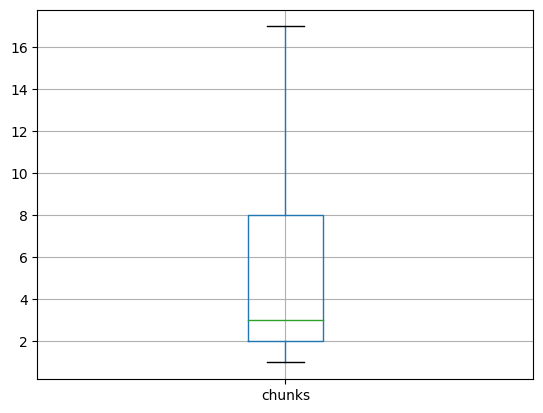

In [19]:
merges_hybrid.boxplot('chunks', showfliers=False)
plt.show()

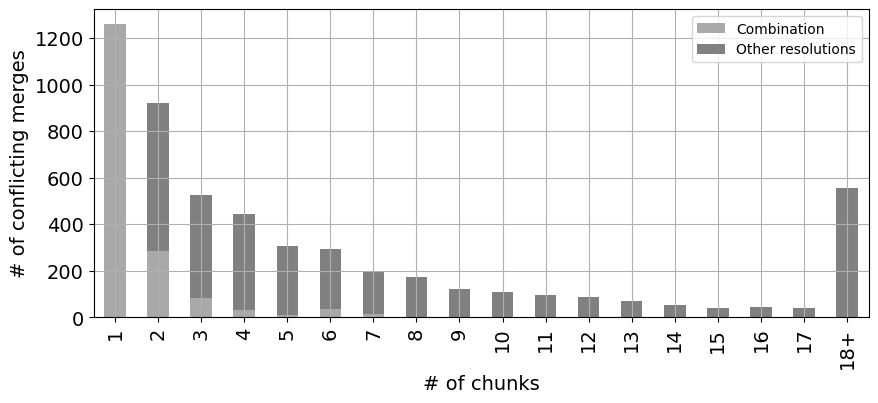

In [20]:
data = []
max_chunks = merges_hybrid['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 18):
    merges_count = len(merges_hybrid[merges_hybrid['chunks'] == chunks_amount])
    merges_combination_count = len(merges_hybrid[(merges_hybrid['chunks'] == chunks_amount) & (merges_hybrid['Combination'] == merges_hybrid['chunks'])])
    merges_not_combination_count = merges_count - merges_combination_count
    if merges_count > 0:
        data.append([chunks_amount, merges_combination_count, merges_not_combination_count])

merges_count = len(merges_hybrid[merges_hybrid['chunks'] >= 18])
merges_combination_count = len(merges_hybrid[(merges_hybrid['chunks'] >= 18) & (merges_hybrid['Combination'] == merges_hybrid['chunks'])])
merges_not_combination_count = merges_count - merges_combination_count
data.append(['18+', merges_combination_count, merges_not_combination_count])

df_plot = pd.DataFrame(data, columns=['chunks', 'Combination', 'Other resolutions'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', stacked=True, ax=ax, legend=False, zorder=1, color=colors)
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting merges", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='upper right')
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/rq1_chunks_vs_merges.png', dpi=300, bbox_inches = "tight")

### Chunks' size

In [21]:
df[['chunk_size', 'v1_size', 'v2_size']].describe()

,chunk_size,v1_size,v2_size
count,10726.000000,10726.000000,10726.000000
mean,13.555379,6.668842,6.886537
std,58.866576,29.755920,32.439524
min,2.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000
50%,6.000000,2.000000,3.000000
75%,11.000000,5.000000,5.000000
max,2545.000000,1352.000000,1402.000000


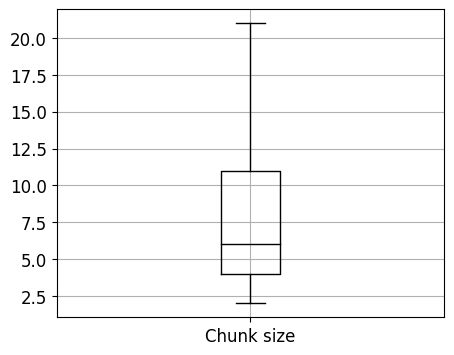

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['chunk_size'], showfliers=False, ax=ax, color='k')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['Chunk size'])
plt.show()
fig.savefig('figures/chunk_size_distribution.png', dpi=300, bbox_inches = "tight")

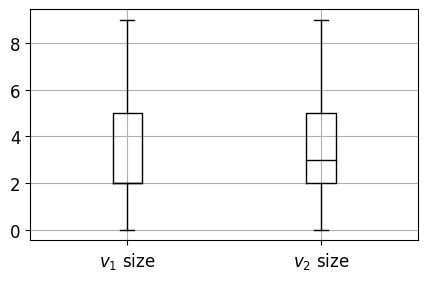

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
df.boxplot(['v1_size', 'v2_size'], showfliers=False, ax = ax, color = 'k')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['$v_{1}$ size', '$v_{2}$ size'])
plt.show()
fig.savefig('figures/v1_v2_size.png', dpi=300, bbox_inches = "tight")

In [24]:
df['v1_size'].value_counts(normalize=True).head(30)

2     0.285475
1     0.141991
3     0.136211
0     0.078594
4     0.074958
5     0.050438
6     0.038971
7     0.028063
8     0.022189
9     0.018460
10    0.014078
11    0.011095
12    0.009883
13    0.009323
16    0.006806
15    0.006340
14    0.006247
17    0.005128
18    0.004475
19    0.004009
20    0.003263
22    0.002517
21    0.002331
25    0.001958
26    0.001865
23    0.001865
27    0.001678
24    0.001678
30    0.001305
29    0.001212
Name: v1_size, dtype: float64

In [25]:
df['v2_size'].value_counts(normalize=True).head(30)

2     0.289670
3     0.132389
1     0.127447
4     0.078967
0     0.073746
5     0.054447
6     0.038691
7     0.030393
8     0.023681
9     0.021630
10    0.014078
11    0.013146
12    0.011374
14    0.008391
13    0.008204
15    0.007272
18    0.005128
16    0.005034
17    0.004382
20    0.004102
19    0.003916
21    0.002890
27    0.002424
22    0.002424
26    0.002051
24    0.001958
23    0.001585
41    0.001585
28    0.001585
25    0.001492
Name: v2_size, dtype: float64

### Resolution size

In [26]:
df['resolution_size'].describe()

count    10726.000000
mean         8.379079
std         35.503146
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1557.000000
Name: resolution_size, dtype: float64

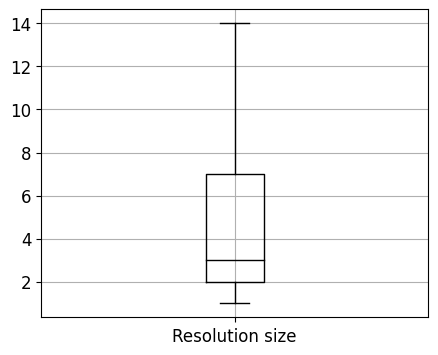

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
df.boxplot(['resolution_size'], showfliers=False, ax=ax, color = 'k')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_xticklabels(['Resolution size'])
plt.show()
fig.savefig('figures/resolution_size.png', dpi=300, bbox_inches = "tight")

### Number of files per failed merge

In [28]:
hybrid_files['chunks'] = hybrid_files['chunks'].astype(int)
hybrid_files.head()

developerdecision,file_id,Combination,Concatenation,Manual,None,Version 1,Version 2,chunks
0,341965,1.0,0.0,0.0,0.0,0.0,0.0,1
1,342076,1.0,0.0,1.0,0.0,2.0,0.0,4
2,342083,1.0,0.0,0.0,0.0,0.0,0.0,1
3,342100,1.0,1.0,2.0,0.0,0.0,0.0,4
4,342118,1.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
hybrid_files['chunks'].describe()

count    8791.000000
mean        2.465590
std         5.418056
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       258.000000
Name: chunks, dtype: float64

In [30]:
hybrid_files['chunks'].value_counts(normalize=True).head(20)

1     0.535548
2     0.219429
3     0.093277
4     0.052554
5     0.030258
6     0.016380
7     0.014105
8     0.006370
9     0.005915
10    0.005119
13    0.003185
12    0.002616
11    0.002616
15    0.001251
14    0.001251
16    0.000910
21    0.000910
18    0.000910
19    0.000796
22    0.000683
Name: chunks, dtype: float64

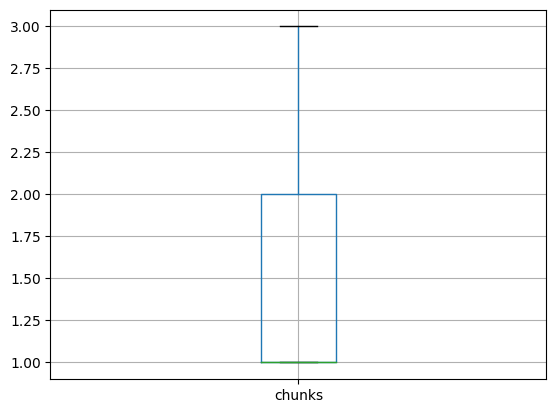

In [31]:
hybrid_files.boxplot('chunks', showfliers=False)
plt.show()

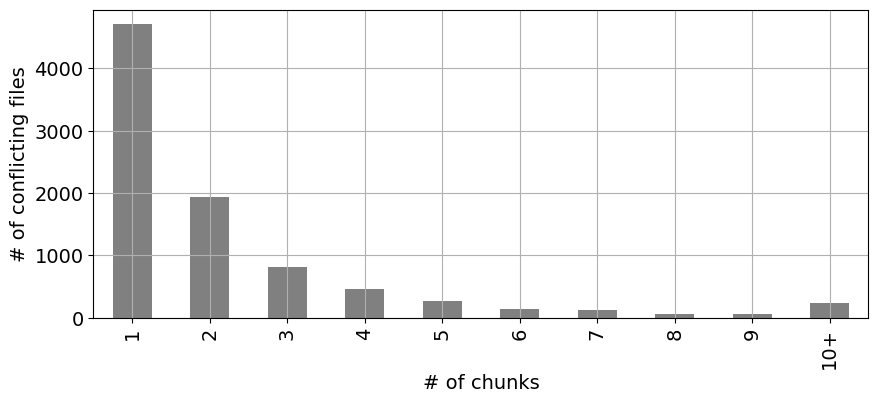

In [32]:
data = []
max_chunks = hybrid_files['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, 10):
    merges_count = len(hybrid_files[hybrid_files['chunks'] == chunks_amount])
    if merges_count > 0:
        data.append([chunks_amount, merges_count])

merges_count = len(hybrid_files[hybrid_files['chunks'] >= 10])     
data.append(['10+', merges_count]) 

df_plot = pd.DataFrame(data, columns=['chunks','merges'])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df_plot.plot(kind='bar', x='chunks', y='merges', ax=ax, legend=False, zorder=1, color = 'gray')
ax.set_xlabel("# of chunks", fontsize=14)
ax.set_ylabel("# of conflicting files", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(zorder=-1)
plt.show()
fig.savefig('figures/files_per_merge.png', dpi=300, bbox_inches = "tight")